# Visualize sediment resuspension

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
import pickle
import xarray as xr

%matplotlib inline

#### Parameters

In [2]:
# domain dimensions:
imin, imax = 1139, 2179
jmin, jmax = 159, 799

#### Load files:

In [7]:
# Modified ANHA12 mesh mask file (http://knossos.eas.ualberta.ca/anha/anhatable.php)
mesh         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = np.array(mesh.variables['nav_lon'])
mesh_lat     = np.array(mesh.variables['nav_lat'])
depths       = np.array(mesh.variables['nav_lev'])

In [8]:
# Erosion rate created by notebook forcing/sediment-resuspension.ipynb
err_file = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/erosion_rate-Pb-20220907.nc')
erosion  = err_file['er_rate'].values

#### Plots

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


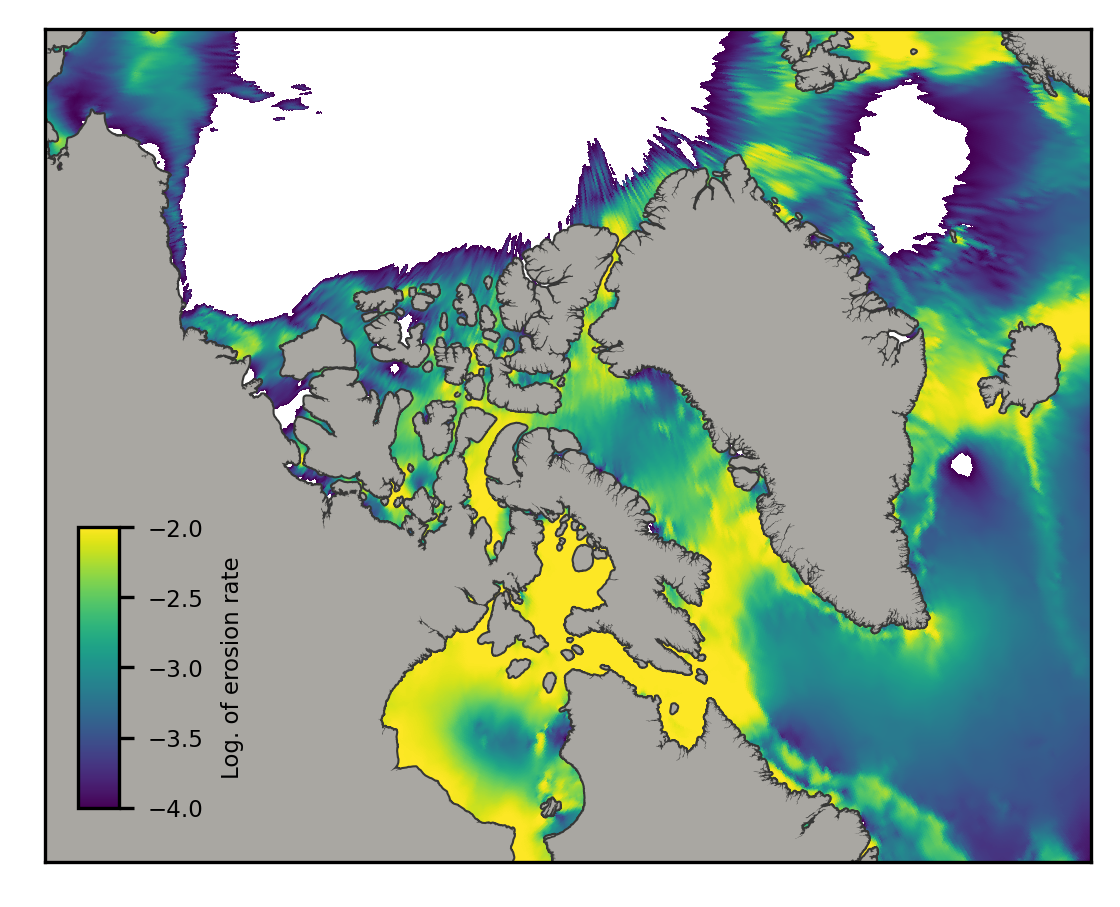

In [10]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb-map.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 

# tidal stress:
CB = proj1.pcolormesh(x_sub[:,:], y_sub[:,:], np.log10(erosion[:,:]), vmin=-4, vmax=-2)

# proj1.contourf(x_sub, y_sub, bathy_masked[0,:,:], colors=['#d8d8d6']) # land mask

cbaxes = fig.add_axes([0.15, 0.18, 0.03, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes)
CBar.ax.tick_params(labelsize=5.5)
CBar.set_label('Log. of erosion rate', fontsize=5.5)

In [22]:
print('Units [g/m2/yr]')
print(f'Average erosion rate in domain: {resus_cst*np.average(new_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')
print(f'Median erosion rate in domain:  {resus_cst*np.median(new_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')
print(f'Maximum erosion rate in domain: {resus_cst*np.amax(new_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')
print(f'Minimum erosion rate in domain: {resus_cst*np.amin(new_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')

print('Units [g/m2/yr]')
print(f'Average erosion rate in domain: {resus_cst*np.average(old_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')
print(f'Median erosion rate in domain:  {resus_cst*np.median(old_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')
print(f'Maximum erosion rate in domain: {resus_cst*np.amax(old_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')
print(f'Minimum erosion rate in domain: {resus_cst*np.amin(old_erosion_rate[imin:imax, jmin:jmax])*1000*365*24*3600:.2f}')

Units [g/m2/yr]
Average erosion rate in domain: 237.26
Median erosion rate in domain:  39.08
Maximum erosion rate in domain: 2808.28
Minimum erosion rate in domain: 0.00
Units [g/m2/yr]
Average erosion rate in domain: 466.53
Median erosion rate in domain:  39.36
Maximum erosion rate in domain: 62697.56
Minimum erosion rate in domain: 0.00
